In [1]:
from build_DS import find_governing_equations
from get_vector_field import get_equation
import numpy as np

In [2]:
dim = 2
bounds = [1.6, 4]
# bounds = [0.5, 0.5, 0.5]
# n_x, n_y
tol = 1e-1
# act = 'elu'
eq = 'van_der_pool_2d'
vf = get_equation(eq)
# time series hyperparameters
dt = 0.1
# init= [0, 1]
t_end = 20
freq = 25
deg = 100
lamda = 0.1
n_traj = 20
verbose = True

Fitting model...
(x0)' = -0.495 x0 + -0.495 x0 + -0.010 cos(1 x0)
(x1)' = -0.500 x0 + 3.217 1 + -0.500 x0 + 0.994 x0^3 + -0.003 x0^5 + 0.014 x0^3 x1^2 + -3.426 x1^100 + 0.001 cos(1 x0) + 0.747 cos(1 x1) + -0.095 cos(2 x1)
Train Model score: 0.999985
Test Model score: 0.999997


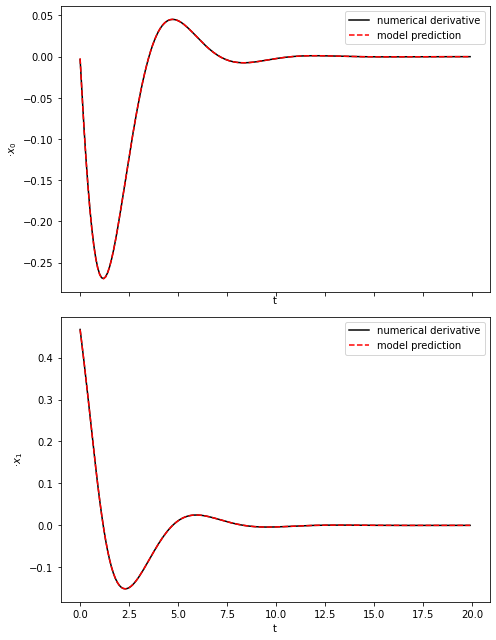

<Figure size 648x360 with 0 Axes>

In [3]:
GE = find_governing_equations(func = get_equation('van_der_pool_1d'), bounds = bounds,
                                        dt= dt, t_end=t_end, dim = dim, n_traj = n_traj,  path = '.', verbose = verbose)
GE.create_time_series(multiple = True)
model, end_time = GE.find_equations(freq, deg, lamda, plot = True)

Epoch 1/5
2/2 [==============================] - 1s 268ms/step - loss: 0.3585 - mae: 0.2402 - val_loss: 0.5223 - val_mae: 0.2723
Epoch 2/5
2/2 [==============================] - 0s 48ms/step - loss: 0.2978 - mae: 0.2277 - val_loss: 0.4017 - val_mae: 0.2214
Epoch 3/5
2/2 [==============================] - 0s 51ms/step - loss: 0.1894 - mae: 0.1734 - val_loss: 0.3293 - val_mae: 0.2347
Epoch 4/5
2/2 [==============================] - 0s 50ms/step - loss: 0.1613 - mae: 0.2051 - val_loss: 0.2878 - val_mae: 0.1750
Epoch 5/5
2/2 [==============================] - 0s 49ms/step - loss: 0.1305 - mae: 0.1384 - val_loss: 0.2684 - val_mae: 0.1230


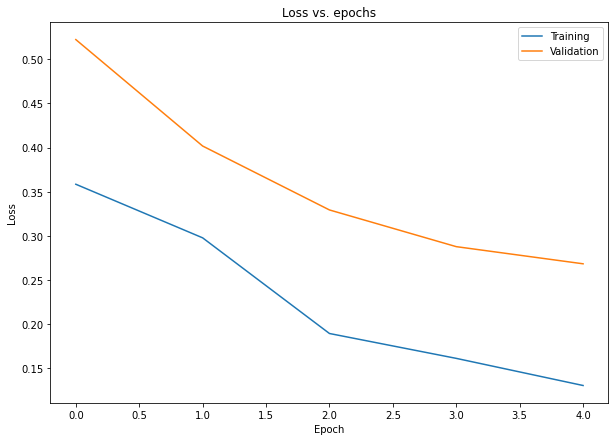

In [14]:
x, y = GE.create_time_series_MLP(dim)
train_dataset, validation_dataset = GE.process_MLP_inputs(x,y)
MLP_model, mlp_time = GE.find_equations_MLP(train_dataset, validation_dataset)

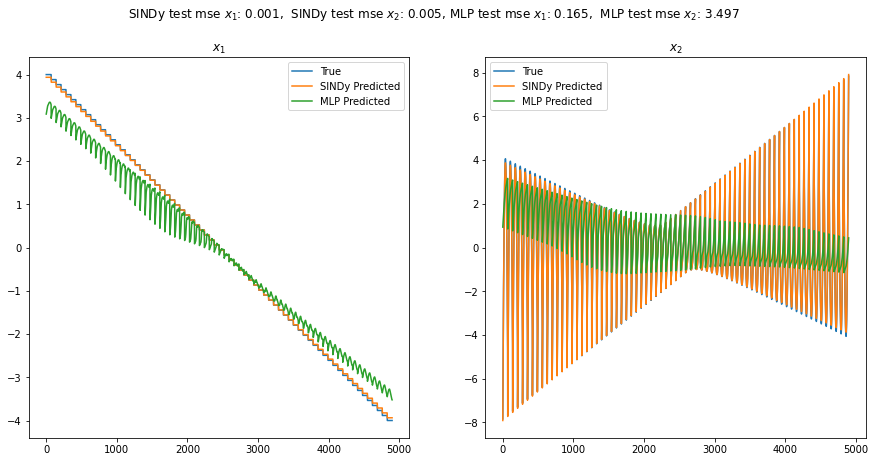

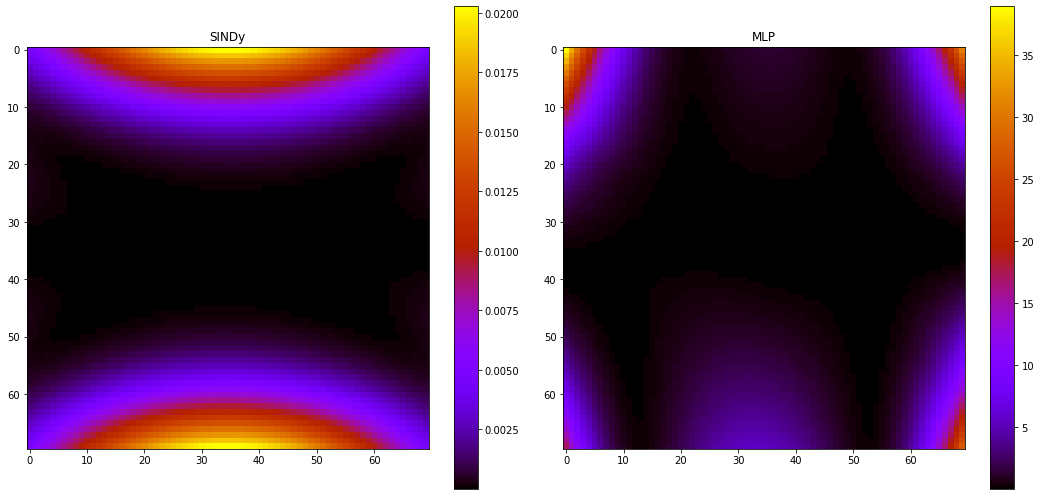

In [16]:
results = GE.evaluate_models(vf, [50,50])

In [17]:
results

(0.0008987234988235271,
 0.005190793428992692,
 0.16516474875603837,
 3.496601071291075)

---- 40 ----- 10
Fitting model...
MLP training...
---- 40 ----- 20
Fitting model...


/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=2.25215e-23): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/lysi2/Documents/UNI_Imperial/Deep_Learning/DL/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=2.25215e-23): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


MLP training...


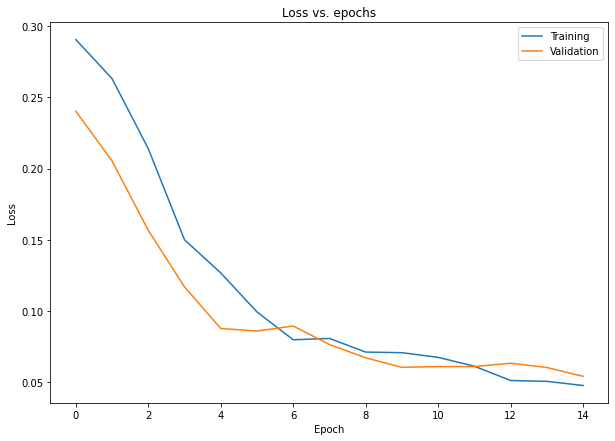

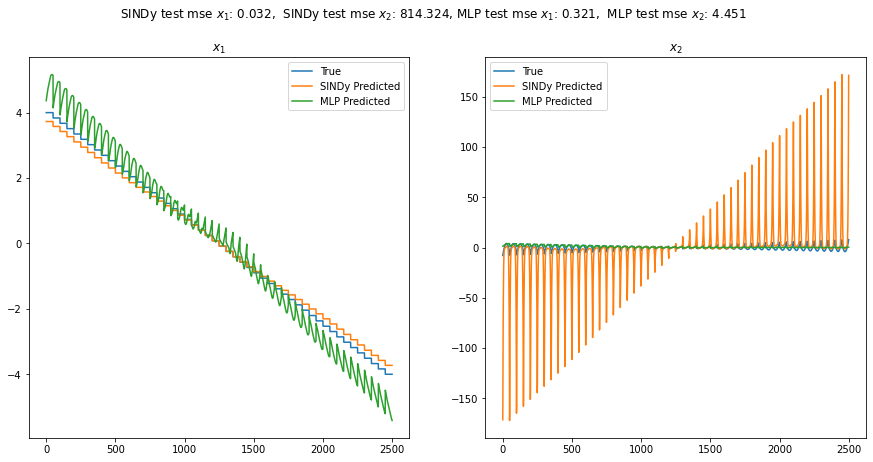

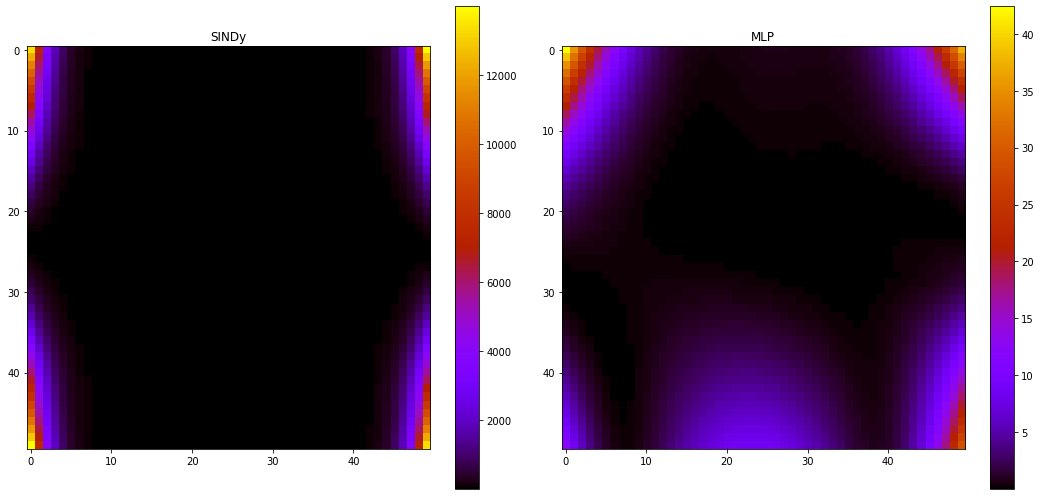

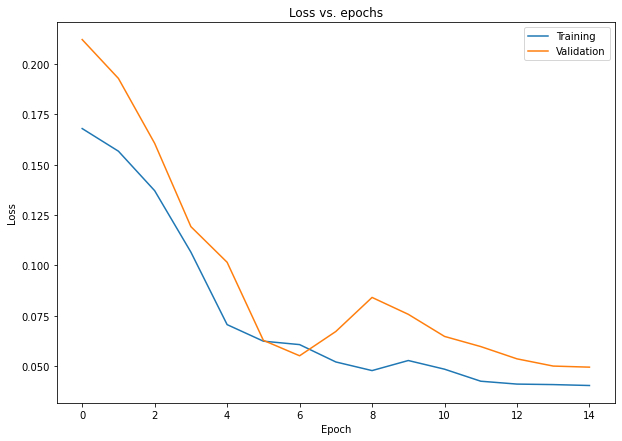

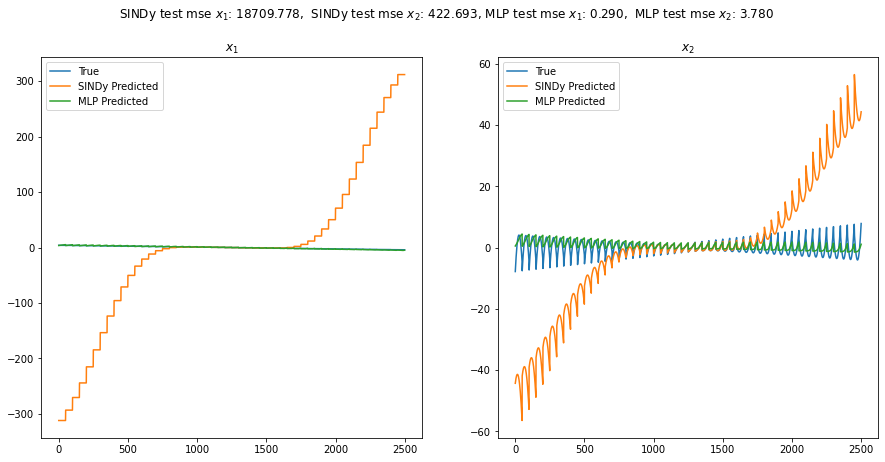

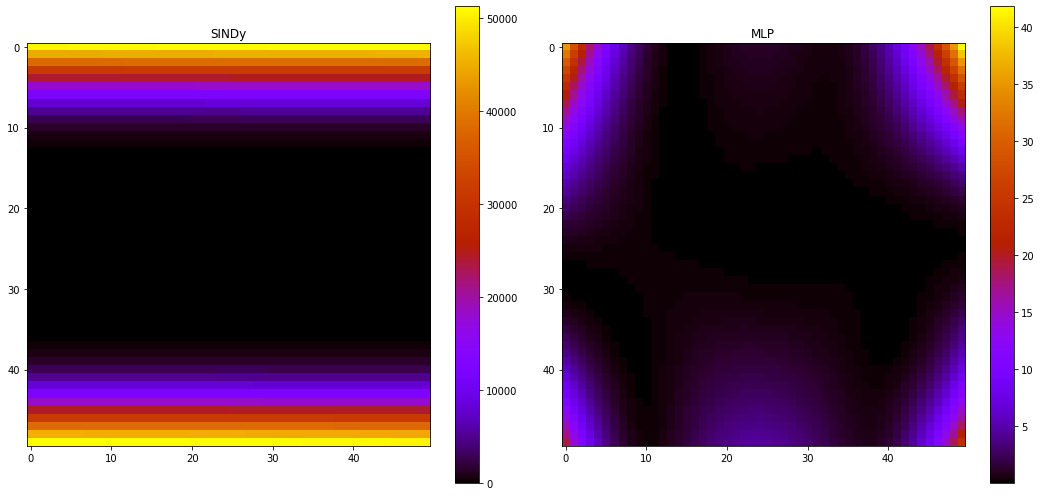

In [8]:
runs = {'n': [], 'traj': [], 'mse_sindy_x1': [], 'mse_sindy_x2': [],'mse_mlp_x1': [],'mse_mlp_x2': [], 'time_S': [], 'time_M': []}
# for dt in  [0.01, 0.02, 0.04, 0.05, 0.1, 0.5]:
for dt in  [0.5]:
    # for traj in [10, 20, 50, 100, 500]:
    for traj in [10, 20]:
        n_points = np.arange(0, t_end, dt).shape[0]
        print('---- {} ----- {}'.format(n_points, traj))
        GE = find_governing_equations(func = get_equation('van_der_pool_1d'), bounds = bounds,
                                        dt= dt, t_end=t_end, dim = dim, n_traj = traj,  path = '.', verbose = False)
        GE.create_time_series(multiple = True)
        model, end_time = GE.find_equations(freq, deg, lamda, plot = False)
        x, y = GE.create_time_series_MLP(dim)
        train_dataset, validation_dataset = GE.process_MLP_inputs(x,y)
        MLP_model, mlp_end_time = GE.find_equations_MLP(train_dataset, validation_dataset)
        res = GE.evaluate_models(vf, [50,50])
        runs['n'].append(n_points)
        runs['traj'].append(traj)
        runs['mse_sindy_x1'].append(res[0])
        runs['mse_sindy_x2'].append(res[1])
        runs['mse_mlp_x1'].append(res[2])
        runs['mse_mlp_x2'].append(res[3])
        runs['time_S'].append(end_time)
        runs['time_M'].append(mlp_end_time)


In [16]:
np.arange(0.01, 0.5, 5e-2)

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46])

In [26]:
for dt in [0.01, 0.02, 0.04, 0.05, 0.1, 0.5]:
    print(np.arange(0, t_end, dt).shape[0])

2000
1000
500
400
200
40


In [9]:
runs

{'n': [40, 40],
 'traj': [10, 20],
 'mse_sindy_x1': [0.03185752265185722, 18709.77798972344],
 'mse_sindy_x2': [814.3236137284085, 422.69252894375296],
 'mse_mlp_x1': [0.32085160841073934, 0.29000146239730207],
 'mse_mlp_x2': [4.450836510538068, 3.7799211282970915],
 'time_S': [1.55, 3.12],
 'time_M': [2.05, 1.93]}